In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### Questions to Investigate:

### 3. Age and Gender:

**A) Which age group has the highest number of bikers?**

**B) What is the average biking distence for the gender groups?**

**B) Bike pattern of diffrent gender groups across various times of the day?**


### 4. Busiest Station

**A) Top 05 beginning desitinaiton in terms of number**

**B) Top 05 end desitinaition in terms of number**


### 5. People Covering the largest distence

**A) Show relationship between gender, age and covered distence**

**B) Show relationship between customer type, and covered distence**



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%store -r df
%store -r df_time
%store -r df_customer
%store -r df_subscriber

In [4]:
df.shape

(1001173, 26)

In [5]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001173 entries, 0 to 179105
Data columns (total 26 columns):
duration_sec               1001173 non-null int64
start_time                 1001173 non-null datetime64[ns]
end_time                   1001173 non-null datetime64[ns]
start_station_id           1001173 non-null int64
start_station_name         1001173 non-null object
start_station_latitude     1001173 non-null float64
start_station_longitude    1001173 non-null float64
end_station_id             1001173 non-null int64
end_station_name           1001173 non-null object
end_station_latitude       1001173 non-null float64
end_station_longitude      1001173 non-null float64
bike_id                    1001173 non-null int64
user_type                  1001173 non-null object
member_birth_year          1001173 non-null float64
member_gender              1001173 non-null object
month                      1001173 non-null object
day                        1001173 non-null object
year

In [7]:
df['full_date']= df.start_time.dt.strftime("%Y-%m-%d")

In [8]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,full_date
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876,2017-12-31
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144,2017-12-31


In [9]:
full_date_count = df['full_date'].value_counts().sort_values()
full_date_count.head(1),full_date_count.tail(1)


(2017-07-02    200
 Name: full_date, dtype: int64, 2018-05-10    7073
 Name: full_date, dtype: int64)

In [10]:
df.query('full_date=="2017-07-02"').count().full_date

200

In [11]:
df.query('full_date=="2018-05-10"').count().full_date

7073

In [12]:
top_5_start_station = df['start_station_name'].value_counts().head(5).reset_index()
top_5_start_station

,index,start_station_name
0,San Francisco Caltrain (Townsend St at 4th St),24017
1,San Francisco Caltrain Station 2 (Townsend St...,22565
2,San Francisco Ferry Building (Harry Bridges Pl...,22511
3,Market St at 10th St,22061
4,Berry St at 4th St,21410


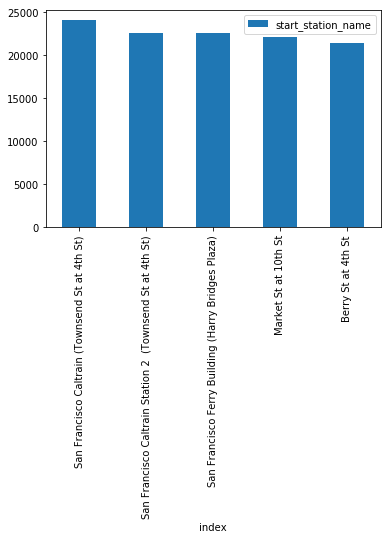

In [13]:
top_5_start_station.plot.bar(x='index')

In [14]:
top_5_end_station = df['end_station_name'].value_counts().head(5).reset_index()
top_5_end_station 

,index,end_station_name
0,San Francisco Caltrain (Townsend St at 4th St),32757
1,San Francisco Caltrain Station 2 (Townsend St...,27702
2,San Francisco Ferry Building (Harry Bridges Pl...,26770
3,Montgomery St BART Station (Market St at 2nd St),24764
4,Berry St at 4th St,20922


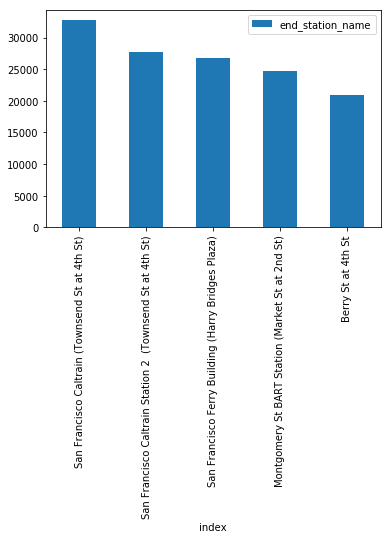

In [24]:
top_5_end_station.plot.bar(x='index')

In [25]:
ct_counts = df.groupby([df['user_type'], df['age_ct'].size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = df['age_ct'] columns = df['user_type'], values = 'count')

SyntaxError: invalid syntax (<ipython-input-25-5b4d67dfc3cc>, line 2)